In [5]:
# things we need for NLP
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()


# things we need for Tensorflow


import numpy as np
import tflearn
import tensorflow as tf
import random

In [6]:
# import our chat-bot intents file
import json
with open('intentBotData1.json') as json_data:
    intents = json.load(json_data)

In [7]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)
print(documents)

146 documents
11 classes ['Apple Store Location', 'Does the screen state BAD I/O?', 'Gate Issues', 'Have you been here more than 3 hours?', 'How To Purchase A Pass', 'Lost/Missing Ticket', 'Machine Issues', 'Nike Store Location', 'Pass Is Unreadable', 'Payment Issues', 'Ticket Is Unreadable']
229 unique stemmed words ["'", "'m", "'paid", "'s", "'ve", ',', '-', '.', '3', ':', ';', 'a', 'about', 'acceiv', 'acquir', 'act', 'address', 'adv', 'aft', 'allow', 'an', 'and', 'any', 'appl', 'ar', 'are', 'around', 'assist', 'assocy', 'at', 'avail', 'bad', 'banknot', 'banknote/bill', 'banknotes/bill', 'barcod', 'be', 'been', 'being', 'beyond', 'but', 'buy', 'by', 'ca', 'can', 'card', 'chang', 'charg', 'check', 'clos', 'closest', 'complet', 'confirm', 'consequ', 'cop', 'correct', 'could', 'credit', 'design', 'detail', 'dev', 'did', 'diff', 'difficul', 'direct', 'dispens', 'display', 'do', 'doe', 'dur', 'encount', 'ent', 'entry', 'er', 'exact', 'excess', 'expery', 'fee', 'find', 'fix', 'follow', 'fo

In [13]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

print(np.array(train_x).shape)
print(np.array(train_y).shape)

print(len(train_x[0]))

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]], [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (146, 2) + inhomogeneous part.

Train on 116 samples, validate on 30 samples
Epoch 1/1000
116/116 [==============================] - 3s 26ms/sample - loss: 5.8530 - acc: 0.0862 - val_loss: 5.3787 - val_acc: 0.0667
Epoch 2/1000
116/116 [==============================] - 0s 763us/sample - loss: 5.5110 - acc: 0.1379 - val_loss: 5.3304 - val_acc: 0.1000
Epoch 3/1000
116/116 [==============================] - 0s 588us/sample - loss: 5.3146 - acc: 0.1466 - val_loss: 5.2860 - val_acc: 0.1667
Epoch 4/1000
116/116 [==============================] - 0s 604us/sample - loss: 5.3529 - acc: 0.1121 - val_loss: 5.2434 - val_acc: 0.2333
Epoch 5/1000
116/116 [==============================] - 0s 609us/sample - loss: 5.2511 - acc: 0.0948 - val_loss: 5.2029 - val_acc: 0.2333
Epoch 6/1000
116/116 [==============================] - 0s 473us/sample - loss: 5.1195 - acc: 0.1724 - val_loss: 5.1642 - val_acc: 0.3000
Epoch 7/1000
116/116 [==============================] - 0s 500us/sample - loss: 5.0374 - acc: 0.1983 - val_loss: 5.1272 - val_ac

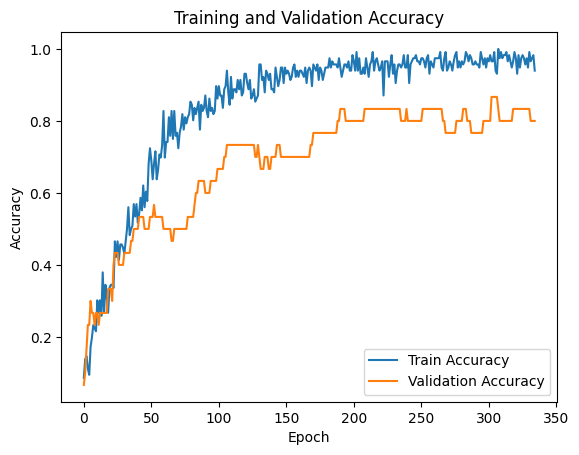

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from keras import models, layers, optimizers, regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization

# Define the EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define the network architecture
model = models.Sequential()
model.add(layers.Dense(128, activation='relu',input_shape=(229,), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.Dense(48, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(36, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(11, activation='softmax'))

# Define the optimizer
opt = optimizers.Adam(learning_rate=0.001, decay=1e-6)

# Compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model and include the EarlyStopping and ModelCheckpoint callbacks
history = model.fit(
    np.array(train_x), np.array(train_y),
    epochs=1000,
    batch_size=100,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)


# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [ ]:
# save all of our data structures
import pickle
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )


In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()


# things we need for Tensorflow


import numpy as np
import tflearn
import tensorflow as tf
import random

# restore all of our data structures
import pickle
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

# import our chat-bot intents file
import json
with open('IntentBotData1.json') as json_data:
    intents = json.load(json_data)

In [ ]:


# net = tflearn.input_data(shape=[None, 89])
# net = tflearn.fully_connected(net, 8)
# net = tflearn.fully_connected(net, 8)
# net = tflearn.fully_connected(net, 10, activation='softmax')
# net = tflearn.regression(net)

# # Define model and setup tensorboard
# model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

# load our saved model
# model.load('Models/model.tflearn')

model.save("Intent_Model.h5")

from tensorflow.keras.models import load_model

# Load the model
model = load_model("Intent_Model.h5")


In [ ]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [ ]:
ERROR_THRESHOLD = 0.05
def classify(sentence):
    # generate probabilities from the model
    results = model.predict(np.array([bow(sentence, words)]))[0]
    print(results)
    print(len(results))
    # filter out predictions below a threshold
    results = [[i, r] for i, r in enumerate(results) if r > ERROR_THRESHOLD]
    print(results)
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    print(results)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    print(return_list)
    return return_list


def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    print(results[0][0])
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [ ]:
response('Hello how are you')

[0.04640635 0.0245009  0.01414883 0.02902934 0.68985224 0.02170824
 0.00438869 0.09171867 0.01737021 0.04227578 0.01860073]
11
[[4, 0.68985224], [7, 0.091718666]]
[[4, 0.68985224], [7, 0.091718666]]
[('How To Purchase A Pass', 0.68985224), ('Nike Store Location', 0.091718666)]
How To Purchase A Pass
To purchase a pass without a ticket, press the 'Pass' button on the screen. You can change the pass type to daily, weekly, or monthly by pressing the 'Next' button.


In [ ]:
response('Ticket Lost')

[4.7272476e-03 6.9653196e-04 6.7093647e-03 2.6386016e-04 3.9029021e-03
 9.6319401e-01 1.8952996e-03 1.6810283e-03 1.8771800e-03 3.1992840e-03
 1.1853359e-02]
11
[[5, 0.963194]]
[[5, 0.963194]]
[('Lost/Missing Ticket', 0.963194)]
Lost/Missing Ticket
If you've lost your ticket, you can purchase a replacement from the pay station. Please note that you will be charged for the maximum time.


In [ ]:
response('Nike location')

[2.0468852e-03 1.0910517e-04 9.6635422e-04 2.0790808e-02 6.9855046e-03
 2.0083708e-04 3.1828753e-05 9.6504599e-01 1.1465570e-03 2.6104406e-03
 6.5700922e-05]
11
[[7, 0.965046]]
[[7, 0.965046]]
[('Nike Store Location', 0.965046)]
Nike Store Location
images/Nike.jpeg


In [ ]:
response('where is Apple Store')

[9.9452138e-01 1.3590675e-03 1.3635399e-05 4.0668900e-05 2.2403721e-03
 1.0786998e-03 5.4773711e-05 2.7753957e-04 8.5814238e-05 3.0091542e-06
 3.2508740e-04]
11
[[0, 0.9945214]]
[[0, 0.9945214]]
[('Apple Store Location', 0.9945214)]
Apple Store Location
images/AppleStore.jpeg


In [ ]:
response('I lost my tickert')


[0.03115651 0.00661998 0.01756194 0.00528069 0.0254347  0.7742109
 0.01844999 0.02347196 0.02083627 0.03573545 0.04124166]
11
[[5, 0.7742109]]
[[5, 0.7742109]]
[('Lost/Missing Ticket', 0.7742109)]
Lost/Missing Ticket
If you've lost your ticket, you can purchase a replacement from the pay station. Please note that you will be charged for the maximum time.


In [ ]:
response('Gate Broken')

[0.01733839 0.02219477 0.28420523 0.06856462 0.10612753 0.04329498
 0.02167268 0.1986246  0.03115048 0.18434429 0.0224824 ]
11
[[2, 0.28420523], [3, 0.068564616], [4, 0.10612753], [7, 0.1986246], [9, 0.18434429]]
[[2, 0.28420523], [7, 0.1986246], [9, 0.18434429], [4, 0.10612753], [3, 0.068564616]]
[('Gate Issues', 0.28420523), ('Nike Store Location', 0.1986246), ('Payment Issues', 0.18434429), ('How To Purchase A Pass', 0.10612753), ('Have you been here more than 3 hours?', 0.068564616)]
Gate Issues
If you're experiencing gate issues, please follow these steps: [Provide guidance based on the specific issue]. If the problem persists, visit an attendant at the site office.


In [ ]:
response('Ticket is not very readable')

[0.00565345 0.01118191 0.07737125 0.00182454 0.02215701 0.02114353
 0.03933886 0.00080056 0.05141972 0.00165862 0.7674506 ]
11
[[2, 0.07737125], [8, 0.05141972], [10, 0.7674506]]
[[10, 0.7674506], [2, 0.07737125], [8, 0.05141972]]
[('Ticket Is Unreadable', 0.7674506), ('Gate Issues', 0.07737125), ('Pass Is Unreadable', 0.05141972)]
Ticket Is Unreadable
Please try again and ensure the ticket is inserted properly. If it's still unreadable, try another exit or pay station. If the ticket still doesn't work, visit an attendant at the site office.


In [ ]:
response('Exceeded Parking Time limit')

[1.5852088e-03 7.8926999e-03 3.5706048e-03 9.2454892e-01 1.1672306e-02
 2.6941995e-04 1.2944299e-03 4.4026125e-02 1.4337087e-03 1.7263187e-03
 1.9803538e-03]
11
[[3, 0.9245489]]
[[3, 0.9245489]]
[('Have you been here more than 3 hours?', 0.9245489)]
Have you been here more than 3 hours?
If you've been parked for more than 3 hours, please purchase a lost ticket from the pay station and use that to exit.


In [ ]:
response('Thanks for the information')

[0.02431536 0.0093113  0.01988438 0.19541909 0.08955073 0.00803813
 0.00391769 0.5720352  0.02090932 0.05028108 0.00633774]
11
[[3, 0.19541909], [4, 0.08955073], [7, 0.5720352], [9, 0.050281078]]
[[7, 0.5720352], [3, 0.19541909], [4, 0.08955073], [9, 0.050281078]]
[('Nike Store Location', 0.5720352), ('Have you been here more than 3 hours?', 0.19541909), ('How To Purchase A Pass', 0.08955073), ('Payment Issues', 0.050281078)]
Nike Store Location
images/Nike.jpeg
